<a href="https://colab.research.google.com/github/ashishgeddam2002/data-science-assignment-excelr/blob/main/Association_rules_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import scipy
import warnings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from scipy import stats
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('Online retail.csv')
df.columns = ['Items']
df

,Items
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Items   7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [ ]:
df.describe()

,Items
count,7500
unique,5175
top,cookies
freq,223


In [ ]:
df.duplicated().sum()

2325

In [ ]:
df.isnull().sum()

,0
Items,0


In [ ]:
df

,Items
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [ ]:
# Generate transactions
transactions = []
for i in range(len(df)):
    transactions.append([str(item) for item in df.iloc[i, 0].split(',')])

# Display number of transactions
print("Number of transactions:", len(transactions))

Number of transactions: 7500


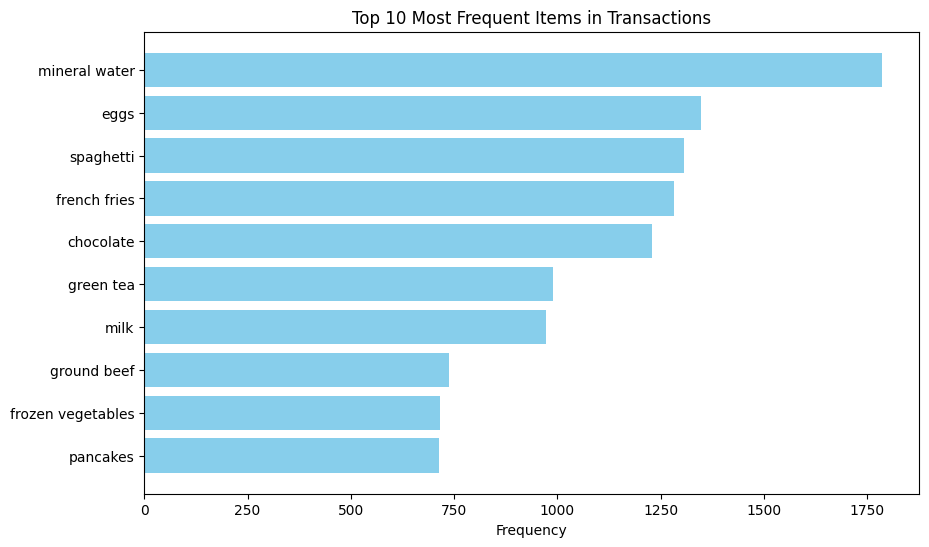

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Split the items in each transaction and count the occurrence of each item
all_items = df.stack().str.split(',').explode().str.strip()
item_counts = Counter(all_items)

# Get the top 10 most frequent items
top_items = item_counts.most_common(10)
items, counts = zip(*top_items)

# Plot the top 10 most frequent items
plt.figure(figsize=(10, 6))
plt.barh(items, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Frequent Items in Transactions')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent item at the top
plt.show()


In [ ]:
# Association Rule Mining
# Initialize the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)
df_trans

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Implement Apriori algorithm
frequent_itemsets = apriori(df_trans, min_support=0.02, use_colnames=True)
# Display the frequent itemsets
print(frequent_itemsets)

      support                           itemsets
0    0.020267                          (almonds)
1    0.033200                          (avocado)
2    0.033733                         (brownies)
3    0.087200                          (burgers)
4    0.030133                           (butter)
..        ...                                ...
99   0.020133  (mineral water, whole wheat rice)
100  0.022933             (spaghetti, olive oil)
101  0.025200              (spaghetti, pancakes)
102  0.021200                (spaghetti, shrimp)
103  0.020933              (spaghetti, tomatoes)

[104 rows x 2 columns]


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('conviction',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
81,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441,0.503458
67,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888
75,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483,0.460018
64,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
89,(olive oil),(spaghetti),0.065733,0.174133,0.022933,0.348884,2.003547,0.011487,1.268387,0.536127
29,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,0.007966,1.257517,0.416947
11,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,0.008504,1.228602,0.396790
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
57,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
71,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812,0.409789


In [ ]:
filtered_rules = rules[(rules['support'] >= 0.01) &
              (rules['confidence'] >= 0.2) &
              (rules['lift'] >= 1)]

In [ ]:
filtered_rules.sort_values('conviction',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
81,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441,0.503458
67,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888
75,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483,0.460018
64,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
89,(olive oil),(spaghetti),0.065733,0.174133,0.022933,0.348884,2.003547,0.011487,1.268387,0.536127
29,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,0.007966,1.257517,0.416947
11,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,0.008504,1.228602,0.396790
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
57,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
71,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812,0.409789


In [ ]:
# Analyze the generated rules
def analyze_rules(rules):
    for _, rule in rules.iterrows():
        print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
        print(f"Support: {rule['support']}")
        print(f"Confidence: {rule['confidence']}")
        print(f"Lift: {rule['lift']}")
        print("=====================================")

In [ ]:
# Interpret the results
analyze_rules(filtered_rules)

Rule: frozenset({'burgers'}) -> frozenset({'eggs'})
Support: 0.0288
Confidence: 0.3302752293577982
Lift: 1.837584733073803
Rule: frozenset({'burgers'}) -> frozenset({'french fries'})
Support: 0.022
Confidence: 0.25229357798165136
Lift: 1.4759764702514706
Rule: frozenset({'burgers'}) -> frozenset({'mineral water'})
Support: 0.0244
Confidence: 0.27981651376146793
Lift: 1.1743838014611134
Rule: frozenset({'burgers'}) -> frozenset({'spaghetti'})
Support: 0.021466666666666665
Confidence: 0.24617737003058102
Lift: 1.413729154080672
Rule: frozenset({'cake'}) -> frozenset({'mineral water'})
Support: 0.027466666666666667
Confidence: 0.33881578947368424
Lift: 1.422002474008188
Rule: frozenset({'chicken'}) -> frozenset({'mineral water'})
Support: 0.0228
Confidence: 0.38
Lift: 1.594851706771125
Rule: frozenset({'chocolate'}) -> frozenset({'eggs'})
Support: 0.0332
Confidence: 0.20260374288039057
Lift: 1.127246343919087
Rule: frozenset({'chocolate'}) -> frozenset({'french fries'})
Support: 0.0344
Co

In [ ]:
rules_df = pd.DataFrame({
    'Support': filtered_rules['support'],
    'Base Item': filtered_rules['antecedents'].apply(lambda x: ', '.join(list(x))), # Add all the antecedent items which are in the form of a set are converted into a list and joined by using',' to form a string
    'Add Item': filtered_rules['consequents'].apply(lambda x: ', '.join(list(x))), # Similarly, Add all the consequent items which are in the form of a set are converted into a list and joined by using',' to form a string
    'Confidence': filtered_rules['confidence'],
    'Lift': filtered_rules['lift']
})

In [ ]:
rules_df.head(10)

,Support,Base Item,Add Item,Confidence,Lift
0,0.028800,burgers,eggs,0.330275,1.837585
2,0.022000,burgers,french fries,0.252294,1.475976
4,0.024400,burgers,mineral water,0.279817,1.174384
6,0.021467,burgers,spaghetti,0.246177,1.413729
9,0.027467,cake,mineral water,0.338816,1.422002
11,0.022800,chicken,mineral water,0.380000,1.594852
12,0.033200,chocolate,eggs,0.202604,1.127246
14,0.034400,chocolate,french fries,0.209927,1.228121
15,0.034400,french fries,chocolate,0.201248,1.228121
17,0.022933,frozen vegetables,chocolate,0.240559,1.468019


Q1. What is lift and why is it important in Association rules?

A. Lift is a metric used in association rule mining to evaluate the strength of an association rule. It is calculated as the ratio of the observed support for a rule to the expected support if the items were independent. Specifically, lift measures how much more likely the consequent (e.g., item B) is to occur given the antecedent (e.g., item A) than it would be if the two items were independent of each other.

Lift = Support of (A U B) / Support (A) x Support (B)

Lift is important for several reasons:

Independence Testing: Lift helps to determine whether the occurrence of one item (or set of items) influences the occurrence of another item (or set of items).
Actionable Insights: High lift values suggest strong associations between items, which can be leveraged for actionable insights in various applications such as marketing, inventory management, and recommendation systems.
Prioritizing Rules: When there are many association rules generated, lift can help prioritize which rules are more significant. Rules with higher lift values are typically more interesting and useful because they indicate stronger relationships between items.
Q2. What is support and Confidence. How do you calculate them?

A. Support is a measure of how frequently an itemset appears in the dataset. It indicates the proportion of transactions in the dataset that contain a particular itemset. Support helps in identifying the popularity of an itemset.

Support = No. of transactions containing A/ Total no. of transactions

Confidence is a measure of the reliability of an association rule. It is defined as the proportion of transactions that contain the antecedent which also contain the consequent. Confidence indicates the likelihood that the consequent is purchased when the antecedent is purchased.

Confidence = Support (A u B) / Support (A)

Q3. What are some limitations or challenges of Association rules mining?

A. Association rule mining is a powerful technique for uncovering interesting relationships in large datasets, but it also comes with several limitations and challenges:

Scalability: As the size of the dataset and the number of items increase, the computational complexity grows exponentially. The algorithm has to examine a potentially vast number of itemsets and their combinations, making it computationally intensive and time-consuming.
Redundancy: Many rules might be redundant or provide similar information, making it hard to extract unique insights. Eg - many rules, such as "bread → milk" and "milk → bread," which might not provide new insights.
Rare Item Problem: Items that occur infrequently might not be identified as significant, even if they have strong associations with other items.
Dynamic Inventory: Seasonal products and changing inventory levels require frequent updates to the analysis.
Sparse Data Issues: Most transactions contain only a few items, making it harder to find strong associations.
